In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import six
import chainer
import chainer.functions as F
import numpy as np

import masalachai
import convnet

In [2]:
network = convnet.ConvNet()
chainer.serializers.load_npz('./caltech_chain.npz', network)

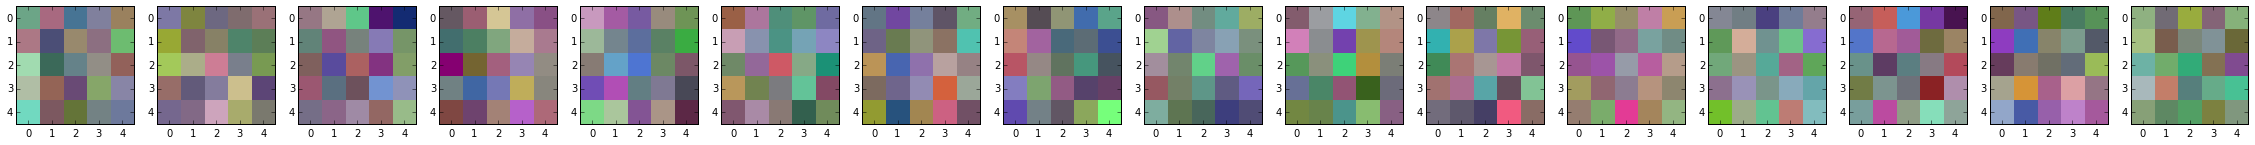

In [3]:
# visualize convolution kernels
layers = {name[1:]: layer for name, layer in network.namedlinks()}
conv1_w = layers['conv1'].W.data # (kernels, channel, row, col)
# normalize to [0,1]
conv1_w -= conv1_w.min()
conv1_w /= conv1_w.max()
# show kernels
fig = plt.figure(figsize=(40, 4))
for i in six.moves.range(conv1_w.shape[0]):
    ax = fig.add_subplot(1, conv1_w.shape[0], i+1)
    plt.imshow(conv1_w[i].transpose(1,2,0), interpolation='nearest')

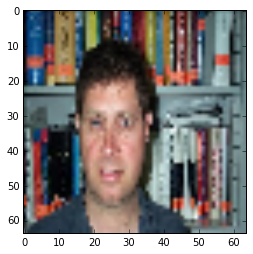

In [38]:
# get an image for visualize feature maps
im = masalachai.preprocesses.load_image('./caltech101/Faces/image_0002.jpg', target_size=(64,64))
im /= im.max()
x = chainer.Variable(np.expand_dims(im,0))
plt.imshow(im.transpose(1,2,0))

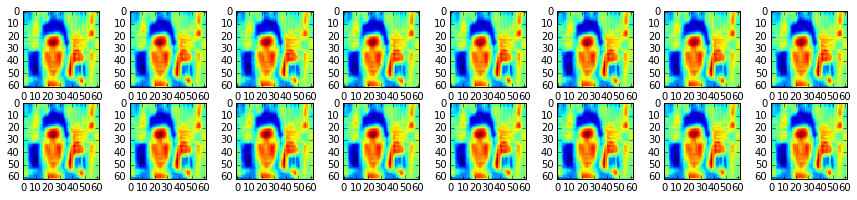

In [52]:
conv1_f = layers['conv1'](x).data[0]
# normalize to [0,1]
conv1_f -= conv1_f.min()
conv1_f /= conv1_f.max()
# show feature maps
fig = plt.figure(figsize=(15, 3))
for i in six.moves.range(conv1_f.shape[0]):
    ax = fig.add_subplot(2, conv1_f.shape[0]/2, i+1)
    plt.imshow(conv1_f[i], interpolation='nearest')

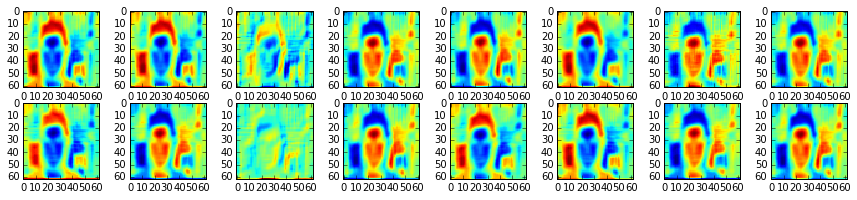

In [53]:
conv1_f = layers['conv1'](x)
conv2_f = layers['conv2'](F.relu(conv1_f)).data[0]
# normalize to [0,1]
conv2_f -= conv2_f.min()
conv2_f /= conv2_f.max()
# show feature maps
fig = plt.figure(figsize=(15, 3))
for i in six.moves.range(conv2_f.shape[0]):
    ax = fig.add_subplot(2, conv2_f.shape[0]/2, i+1)
    plt.imshow(conv2_f[i], interpolation='nearest')